In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the Walmart dataset
walmart_data = pd.read_csv("walmart.csv")

In [3]:
# Inspect the data
print(walmart_data.head())
print(walmart_data.info())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtyp

In [4]:
# Define a function to convert age ranges to numerical values (midpoints)
def convert_age(age_str):
    age_map = {
        '0-17': 8.5,
        '18-25': 21.5,
        '26-35': 30.5,
        '36-45': 40.5,
        '46-50': 48,
        '51-55': 53,
        '55+': 60  # assuming 60 as the midpoint for '55+'
    }
    return age_map.get(age_str, 30.5)  # Default to 30.5 in case of missing values


In [5]:
# Apply the conversion to the Age column
walmart_data['Age'] = walmart_data['Age'].apply(convert_age)

In [6]:
# Preprocess the data
# Encode categorical columns (Gender, City_Category, Stay_In_Current_City_Years)
le_gender = LabelEncoder()
le_city = LabelEncoder()
le_stay = LabelEncoder()

In [7]:
walmart_data['gender_encoded'] = le_gender.fit_transform(walmart_data['Gender'])
walmart_data['city_encoded'] = le_city.fit_transform(walmart_data['City_Category'])
walmart_data['stay_encoded'] = le_stay.fit_transform(walmart_data['Stay_In_Current_City_Years'])


In [8]:
# Select relevant features for clustering
features = walmart_data[['Age', 'Occupation', 'Product_Category', 'Purchase', 
                         'gender_encoded', 'city_encoded', 'stay_encoded', 'Marital_Status']]


In [9]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [10]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)

In [11]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

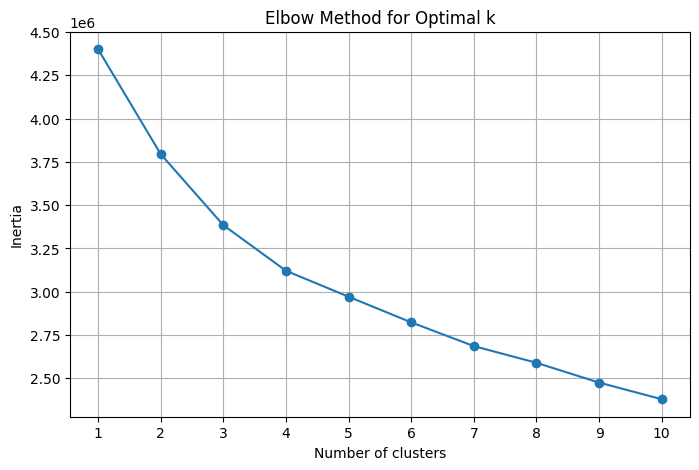

In [12]:
# Plot the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [13]:
# Apply K-means clustering with the optimal number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
walmart_data['cluster'] = kmeans.fit_predict(scaled_features)


In [14]:
# Visualize clusters using PCA for 2D plotting
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

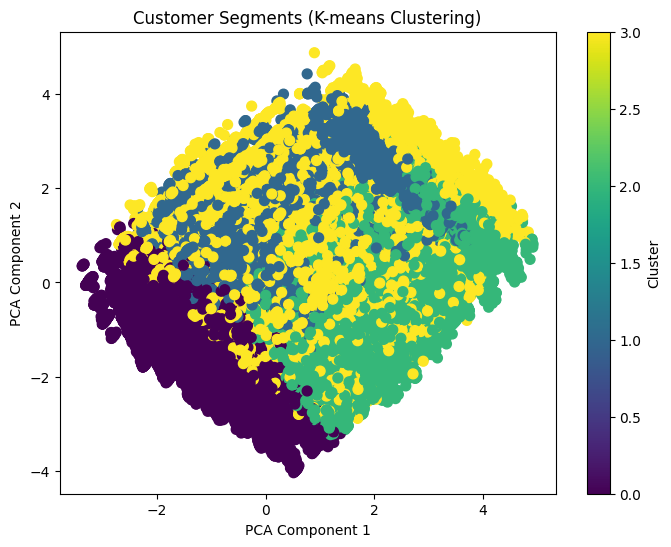

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=walmart_data['cluster'], cmap='viridis', s=50)
plt.title('Customer Segments (K-means Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()